In [1]:
import random
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm.auto import tqdm
import ipyplot
import dlib

from utils import *

In [2]:
facedetect_data = Model.find((Model.filename % "wedding*moose")).all()

len(facedetect_data)

1544

In [3]:
for model in random.sample(facedetect_data, len(facedetect_data)-1):
    if model.faces[0].probability != 0:
        sample = model
sample.dict()

{'pk': '01GFVF5X2WHX6SBENXP7WH9JY8',
 'filename': '/data/photos/2015-wedding-moose-photos/ab_hawk_hollow_wedding_lansing-854.jpeg',
 'faces': [{'pk': '01GFVF5X2WEFN0YMM2KG849KG3',
   'bbox': {'pk': '01GFVF5X2WPH69AWQJXR191J3D',
    'x1': 3449,
    'y1': 1140,
    'x2': 3804,
    'y2': 1628},
   'probability': 5,
   'label': 0,
   'descriptor': 'b"8\\xe5\\x95\\xbd\\xa4H\\xda=\\xdc|%=i \\x96\\xbd\\x84#\\x02\\xbexJ\\x8f\\xbd\\x80\\xc5\\xda\\xbc\\xee\\xee\\xc1\\xbdZ\\xbd\\xb2=@\\x8e};g\\x99_>\\x10\\xae\\x92\\xbc\\xd2\\xad_\\xbex\\xde\\x82\\xbd\\n\\xc4(\\xbdf\\xa7\\xbd=9\\xb90\\xbe\\x1fx\\xc3\\xbd\\x12u\\xc5\\xbd^\\x89E\\xbd\\xd4\\xdc\\xa4=\\x17Hz=\\xd0\\xd1\\x13\\xbc\\x80O\\xab\\xbb\\x9a\\x98\\xc8\\xbdh\\xe8\\x8e\\xbe&\\xd6\\xfc\\xbd\\n+\\xbc\\xbdr*\\xf1=\\xb2\\xd1\\xe5\\xbd\\xb6#\\x16=\\xb4\\xc3\\xfd<\\x08?\\x07\\xbe\\xf2{\\xd1\\xbcR\\x95$=\\x04K:=\\x82\\xf5\\x8f\\xbdy\\xc2+\\xbe\\xfeEa>\\xd8+\\xde<y\\xb1<\\xbe\\xe0\\xe1\\x1c\\xbd\\x86\\x98\\x19=yr\\x90>_\\xb4 >\\x00\\rS\\xbbx\\x18\\xa1=T

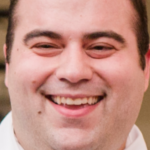

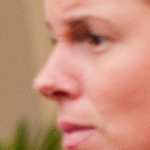

In [23]:
import dlib
detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor("shape_predictor_5_face_landmarks.dat")

pil_image = Image.open(sample.filename)

images = []
if pil_image.mode != "RGB":
    pil_image = pil_image.convert("RGB")


for face in sample.faces:
    image = np.array(pil_image)
    faces = dlib.full_object_detections()
    detection = dlib.rectangle(face.bbox.x1, face.bbox.y1, face.bbox.x2, face.bbox.y2)
    img_crop = pil_image.crop((face.bbox.x1, face.bbox.y1, face.bbox.x2, face.bbox.y2))
    faces.append(sp(image, detection))
    img = Image.fromarray(dlib.get_face_chips(image, faces)[0])
    img.show()


In [20]:
detector(image,1)[0]

rectangle(3414,1232,3799,1617)

In [21]:
sp(image, detection)

In [5]:
def organize_facial_clips(model, shape=224):
    image = Image.open(model.filename)
    faces = dlib.full_object_detections()
    images = []
    if image.mode != "RGB":
        image = image.convert("RGB")
    image = np.array(image)
    for face in model.faces:
        detection = dlib.rectangle(face.bbox.x1, face.bbox.y1, face.bbox.x2, face.bbox.y2)
        faces.append(sp(image, detection))
        images.append(dlib.get_face_chips(image, faces, size=shape))
    return images

In [6]:
# samp_clips = organize_facial_clips(sample)